In [1]:
import uproot as uproot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import sys
import h5py

In [2]:
sys.path.append("/home/surajrai1900/IWCD_ParticleGun-analysis")

In [3]:
import create_file
import utils

In [4]:
df = create_file.relevant_df()

/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in true_divide
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in true_divide
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:3

In [5]:
df

,pgamma,pe,pmu,ppi0,h5_labels,h5_momentum,h5_towall,h5_dwall,e/mu_likelihood ratio,pi0/e_likelihood ratio,reco_electron_mom,reco_electron_dwall,reco_electron_towall,pi0_mass,true_sig
0,6.805751e-01,2.425326e-01,5.177643e-06,0.076887,0,245.777585,190.761574,64.608521,114.199707,54.480957,250.916840,57.913010,191.407663,9.491168,0
1,7.944071e-01,1.203437e-01,5.890467e-07,0.085249,0,858.386823,158.604782,99.009644,1074.375977,78.951660,797.857849,119.633789,180.764429,118.400070,0
2,6.901310e-01,4.059530e-02,5.872762e-08,0.269274,0,984.556023,41.012970,30.859924,74.315430,324.837402,150.115875,-37.203552,662.625427,21.504663,0
3,2.611938e-01,7.083367e-01,6.118560e-07,0.030469,0,818.989202,417.253355,121.900787,946.374023,110.063477,878.783569,116.365997,424.645895,6.629326,0
4,6.674357e-01,1.820178e-01,5.356713e-05,0.150493,0,60.207409,78.351025,74.096588,76.118286,24.191650,61.221466,81.450684,81.715966,10.604737,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671515,4.895870e-01,1.703820e-01,1.041590e-07,0.340031,3,1129.409646,700.627380,1.895538,878.447266,66.927734,775.435730,94.645874,692.367065,50.799816,0
4671516,4.543071e-01,3.465165e-01,2.957127e-06,0.199173,3,762.779145,261.614868,60.631088,121.249512,347.689941,364.943909,56.375961,289.517944,22.597305,0
4671517,1.825165e-03,7.390963e-04,1.395301e-09,0.997436,3,570.130133,141.040481,23.028564,327.521484,406.167969,582.555054,46.259186,190.915211,66.667923,0
4671518,4.834746e-01,4.964638e-01,7.220223e-08,0.020062,3,424.911380,368.044983,125.783417,335.249512,-5.601074,367.815887,124.889160,354.853577,9.226375,0


**Applying Basic Cuts**

Before comparing signal and background, we apply the same cuts as defined by Antoine:

- `reco_dwall` > 50
- `reco_towall` > 100
- `reco_electron_mom` > 100
- `true_muon_mom` > 2 * `true_muon_dwall`


In [6]:
basic_cuts = utils.return_basic_cuts(df)

In [7]:
df_base = df[basic_cuts]

In [8]:
df_base

,pgamma,pe,pmu,ppi0,h5_labels,h5_momentum,h5_towall,h5_dwall,e/mu_likelihood ratio,pi0/e_likelihood ratio,reco_electron_mom,reco_electron_dwall,reco_electron_towall,pi0_mass,true_sig
0,6.805751e-01,2.425326e-01,5.177643e-06,0.076887,0,245.777585,190.761574,64.608521,114.199707,54.480957,250.916840,57.913010,191.407663,9.491168,0
1,7.944071e-01,1.203437e-01,5.890467e-07,0.085249,0,858.386823,158.604782,99.009644,1074.375977,78.951660,797.857849,119.633789,180.764429,118.400070,0
3,2.611938e-01,7.083367e-01,6.118560e-07,0.030469,0,818.989202,417.253355,121.900787,946.374023,110.063477,878.783569,116.365997,424.645895,6.629326,0
5,4.878837e-01,4.765401e-01,4.112133e-08,0.035576,0,285.752748,266.553387,215.172867,250.217773,21.986816,285.267792,227.710052,293.030630,13.539650,0
6,5.436735e-01,4.106899e-01,8.861887e-08,0.045637,0,624.871212,290.227371,174.569366,317.137695,30.552734,518.766113,175.688873,296.323309,9.518740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671512,2.017384e-03,5.432505e-04,1.527801e-11,0.997439,3,112.059063,540.378639,239.377289,542.627441,434.548340,167.242783,200.483871,574.211044,120.150681,0
4671515,4.895870e-01,1.703820e-01,1.041590e-07,0.340031,3,1129.409646,700.627380,1.895538,878.447266,66.927734,775.435730,94.645874,692.367065,50.799816,0
4671516,4.543071e-01,3.465165e-01,2.957127e-06,0.199173,3,762.779145,261.614868,60.631088,121.249512,347.689941,364.943909,56.375961,289.517944,22.597305,0
4671518,4.834746e-01,4.964638e-01,7.220223e-08,0.020062,3,424.911380,368.044983,125.783417,335.249512,-5.601074,367.815887,124.889160,354.853577,9.226375,0


717.0087961521122
766.0693382610466


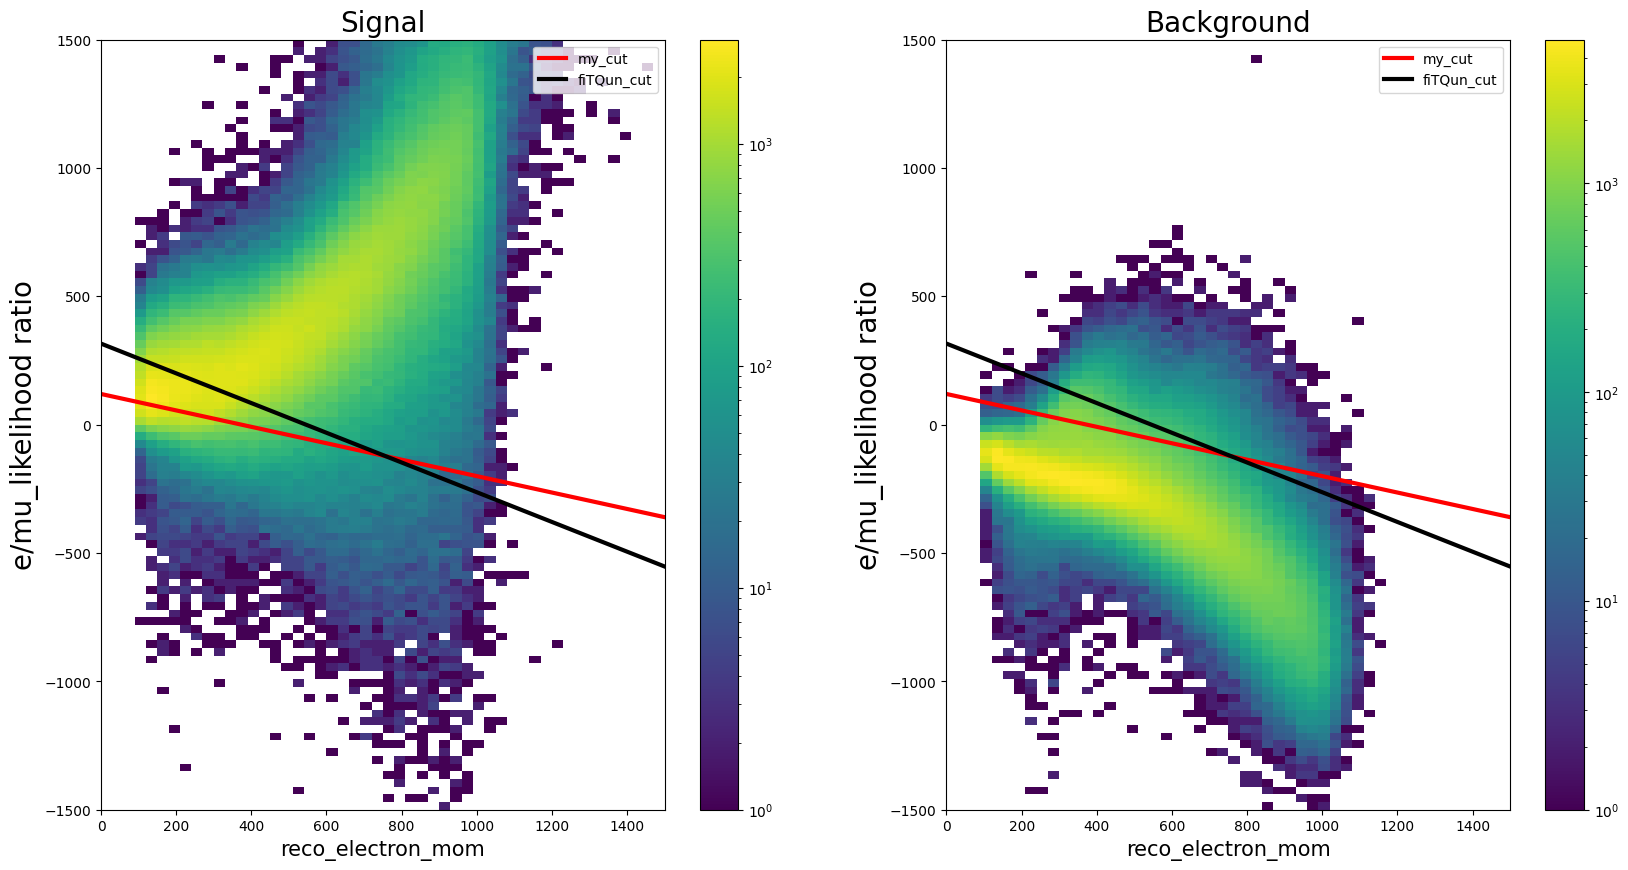

In [9]:
fig, axes = utils.plot_sg_bg(df_base, 1, 2, 'reco_electron_mom', 'e/mu_likelihood ratio', [0, 1500], [-1500, 1500], 50, 100)

# Applying the cuts: (Separating electron and muon)

x = np.linspace(0,1500, 1000)
y = 119.8 - x*0.32                             # My cut
y_1 = 316 - x*0.579                            # fiTQun predefined cut

#optimizing the cut: (y = mx+b)
# m, b, accuracy = utils.optimum_cut_linear(df_base, 1, 2, 'reco_electron_mom', 'e/mu_likelihood ratio', -0.32, 119.8)
# print(m, b, accuracy)

print(utils.check_accuracy(df_base[(df_base['e/mu_likelihood ratio'] > 316 - 0.579*df_base['reco_electron_mom'])], 1, 2))
print(utils.check_accuracy(df_base[(df_base['e/mu_likelihood ratio'] > 119.8 - 0.32*df_base['reco_electron_mom'])], 1, 2))

axes[0].plot(x,y, color = "red", linewidth =3 , label = 'my_cut')
axes[1].plot(x,y, color = "red", linewidth =3 , label = 'my_cut' )

axes[0].plot(x,y_1, color = "black", linewidth =3, label = 'fiTQun_cut' )
axes[1].plot(x,y_1, color = "black", linewidth =3 , label = 'fiTQun_cut')

axes[0].legend()
axes[1].legend()

plt.show()



In [10]:
df_emu_mom = df_base[(df_base['e/mu_likelihood ratio'] > 119.8 -0.32*df_base['reco_electron_mom'])]

768.8107681331268


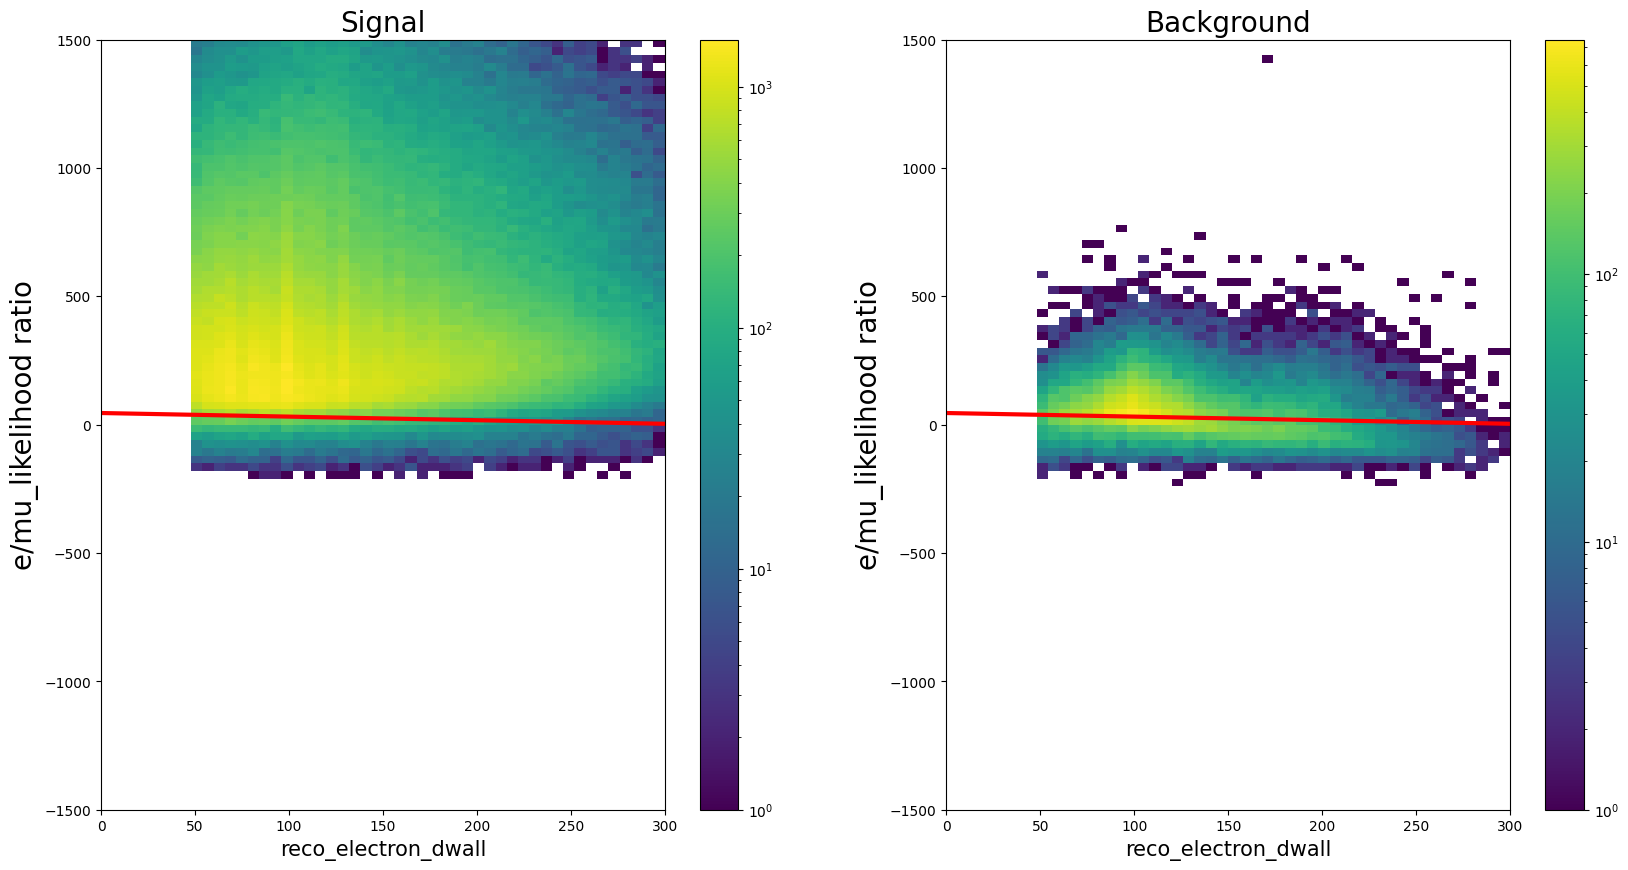

In [11]:
fig, axes = utils.plot_sg_bg(df_emu_mom, 1, 2, 'reco_electron_dwall', 'e/mu_likelihood ratio', [0, 300], [-1500, 1500], 50, 100)

# Applying the cuts: (Separating electron and muon)

x = np.linspace(0,300, 1000)
y = 45.6 - x*0.14                             # My cut

# optimizing the cut: (y = mx+b)
# m, b, accuracy = utils.optimum_cut_linear(df_emu_mom, 1, 2, 'reco_electron_dwall', 'e/mu_likelihood ratio', -0.14, 45.6)
# print(m, b, accuracy)

print(utils.check_accuracy(df_emu_mom[(df_emu_mom['e/mu_likelihood ratio'] > 45.6 - 0.14*df_emu_mom['reco_electron_dwall'])], 1, 2))

axes[0].plot(x,y, color = "red", linewidth =3 , label = 'my_cut')
axes[1].plot(x,y, color = "red", linewidth =3 , label = 'my_cut' )

plt.show()



In [12]:
df_emu_dwall = df_emu_mom[(df['e/mu_likelihood ratio'] > 45.6 -0.14*df['reco_electron_dwall'])]

/tmp/ipykernel_52079/29649067.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_emu_dwall = df_emu_mom[(df['e/mu_likelihood ratio'] > 45.6 -0.14*df['reco_electron_dwall'])]


770.5225110856263


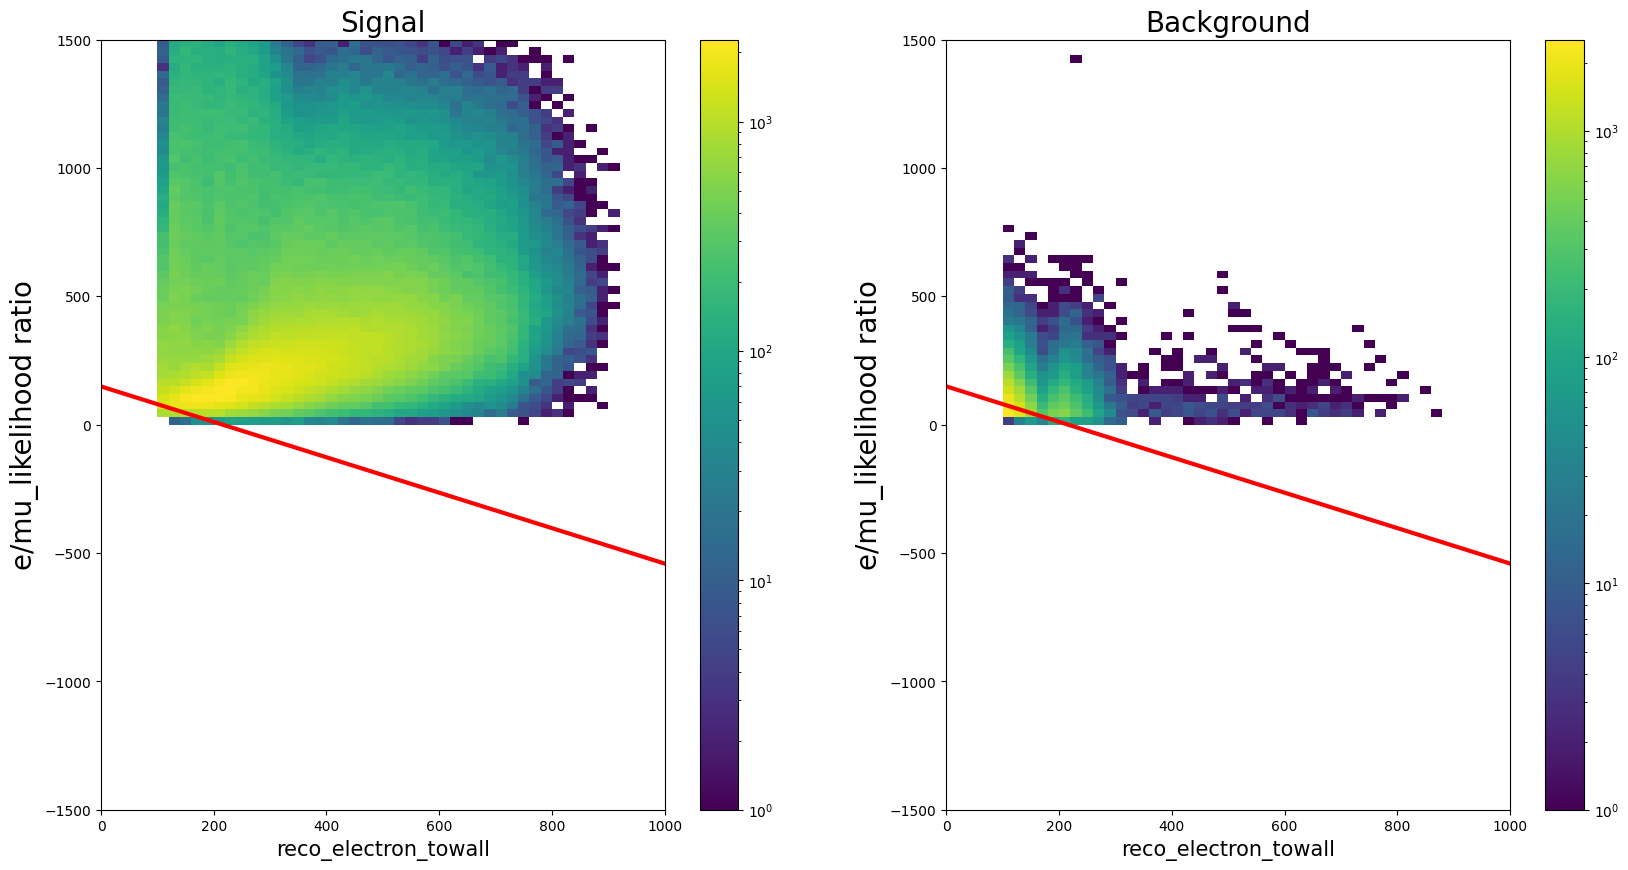

In [13]:
fig, axes = utils.plot_sg_bg(df_emu_dwall, 1, 2, 'reco_electron_towall', 'e/mu_likelihood ratio', [0, 1000], [-1500, 1500], 50, 100)

# Applying the cuts: (Separating electron and muon)

x = np.linspace(0,1000, 1000)
y = 149.1 - x*0.69                            # My cut

# optimizing the cut: (y = mx+b)
# m, b, accuracy = utils.optimum_cut_linear(df_emu_dwall, 1, 2, 'reco_electron_towall', 'e/mu_likelihood ratio', -0.69, 149.1)
# print(m, b, accuracy)
print(utils.check_accuracy(df_emu_dwall[(df_emu_dwall['e/mu_likelihood ratio'] > 149.1 - 0.69*df_emu_dwall['reco_electron_towall'])], 1, 2))


axes[0].plot(x,y, color = "red", linewidth =3 , label = 'my_cut')
axes[1].plot(x,y, color = "red", linewidth =3 , label = 'my_cut' )

plt.show()

In [14]:
df_emu_towall = df_emu_dwall[(df['e/mu_likelihood ratio'] > 149.1 -0.69*df['reco_electron_towall'])]

/tmp/ipykernel_52079/3506607173.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_emu_towall = df_emu_dwall[(df['e/mu_likelihood ratio'] > 149.1 -0.69*df['reco_electron_towall'])]


### fiTQun e/mu Separation Cuts

The separation cuts defined for electron/muon separation in fiTQun are:

- $ \text{lr} > 119.8 - 0.32 \times \text{reco_mom}$
- $ \text{lr} > 45.6 - 0.14 \times \text{reco_dwall}$
- $ \text{lr} > 149.1 - 0.69 \times \text{reco_towall}$



In [15]:
df_base

,pgamma,pe,pmu,ppi0,h5_labels,h5_momentum,h5_towall,h5_dwall,e/mu_likelihood ratio,pi0/e_likelihood ratio,reco_electron_mom,reco_electron_dwall,reco_electron_towall,pi0_mass,true_sig
0,6.805751e-01,2.425326e-01,5.177643e-06,0.076887,0,245.777585,190.761574,64.608521,114.199707,54.480957,250.916840,57.913010,191.407663,9.491168,0
1,7.944071e-01,1.203437e-01,5.890467e-07,0.085249,0,858.386823,158.604782,99.009644,1074.375977,78.951660,797.857849,119.633789,180.764429,118.400070,0
3,2.611938e-01,7.083367e-01,6.118560e-07,0.030469,0,818.989202,417.253355,121.900787,946.374023,110.063477,878.783569,116.365997,424.645895,6.629326,0
5,4.878837e-01,4.765401e-01,4.112133e-08,0.035576,0,285.752748,266.553387,215.172867,250.217773,21.986816,285.267792,227.710052,293.030630,13.539650,0
6,5.436735e-01,4.106899e-01,8.861887e-08,0.045637,0,624.871212,290.227371,174.569366,317.137695,30.552734,518.766113,175.688873,296.323309,9.518740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671512,2.017384e-03,5.432505e-04,1.527801e-11,0.997439,3,112.059063,540.378639,239.377289,542.627441,434.548340,167.242783,200.483871,574.211044,120.150681,0
4671515,4.895870e-01,1.703820e-01,1.041590e-07,0.340031,3,1129.409646,700.627380,1.895538,878.447266,66.927734,775.435730,94.645874,692.367065,50.799816,0
4671516,4.543071e-01,3.465165e-01,2.957127e-06,0.199173,3,762.779145,261.614868,60.631088,121.249512,347.689941,364.943909,56.375961,289.517944,22.597305,0
4671518,4.834746e-01,4.964638e-01,7.220223e-08,0.020062,3,424.911380,368.044983,125.783417,335.249512,-5.601074,367.815887,124.889160,354.853577,9.226375,0


580.0254486680371
629.7164593261334


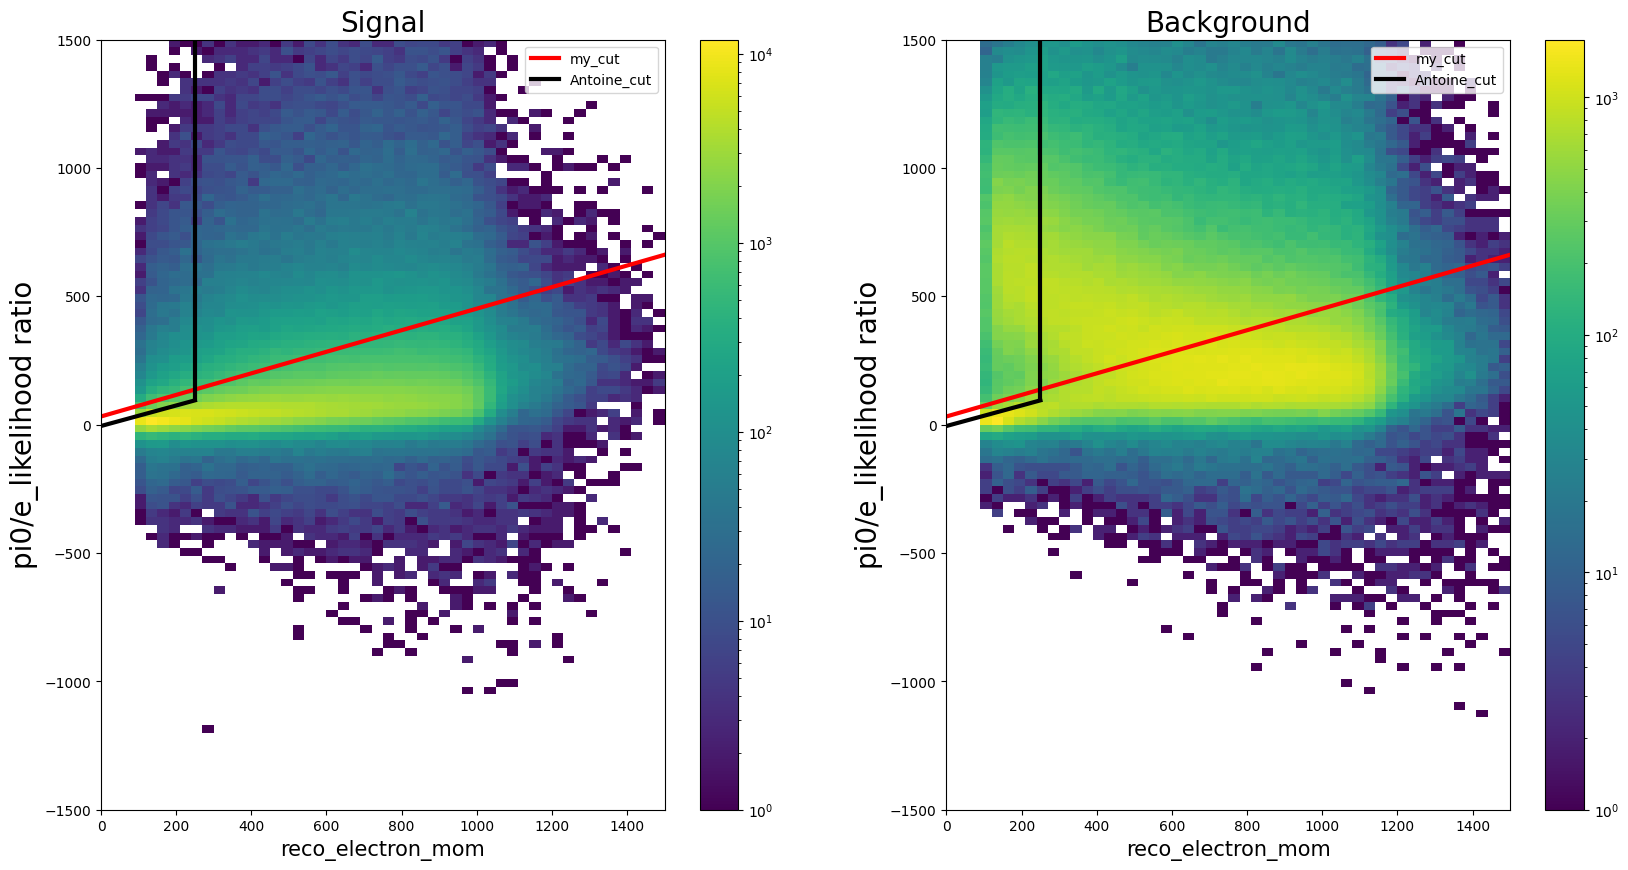

In [16]:
fig, axes = utils.plot_sg_bg(df_base, 1, 3, 'reco_electron_mom', 'pi0/e_likelihood ratio', [0, 1500], [-1500, 1500], 50, 100)

# Applying the cuts: (Separating electron and pi0)

x = np.linspace(0,1500, 1000)            # lr < 0.2*reco_mom + 30
y = x*0.42 + 32.2                           # My cut

x_1 = np.linspace(0, 250, 500)           # ~(reco_mom < 250 && lr > (0.4*reco_mom - 5))
y_1 = x_1*0.4 - 5                        # Antoine's NotRemovedByPi0MomCut 

#optimizing the cut: (y = mx+b)
# m, b, accuracy = utils.optimum_cut_linear(df_base, 1, 3, 'reco_electron_mom', 'pi0/e_likelihood ratio', 0.42, 32.2, greater_than = False)
# print(m, b, accuracy)

print(utils.check_accuracy(df_base[~((df_base['reco_electron_mom'] < 250)
                              & ((df_base['pi0/e_likelihood ratio'] > (0.4*df_base['reco_electron_mom'] -5))))], 1, 3))
print(utils.check_accuracy(df_base[(df_base['pi0/e_likelihood ratio'] < 0.42*df_base['reco_electron_mom'] + 32.2)], 1, 3))


axes[0].plot(x,y, color = "red", linewidth =3 , label = 'my_cut')
axes[1].plot(x,y, color = "red", linewidth =3 , label = 'my_cut' )

axes[0].plot(x_1,y_1, color = "black", linewidth =3, label = 'Antoine_cut' )
axes[1].plot(x_1,y_1, color = "black", linewidth =3 , label = 'Antoine_cut')

axes[0].vlines(250, 95, 1500, colors='black', linewidth=3)
axes[1].vlines(250, 95, 1500, colors='black', linewidth=3)


axes[0].legend()
axes[1].legend()

plt.show()



In [17]:
df_epi0_mom = df_base[(df_base['pi0/e_likelihood ratio'] < 0.42*df_base['reco_electron_mom'] + 32.2)]

629.7580671850027
590.1168845202153
630.2211724537534


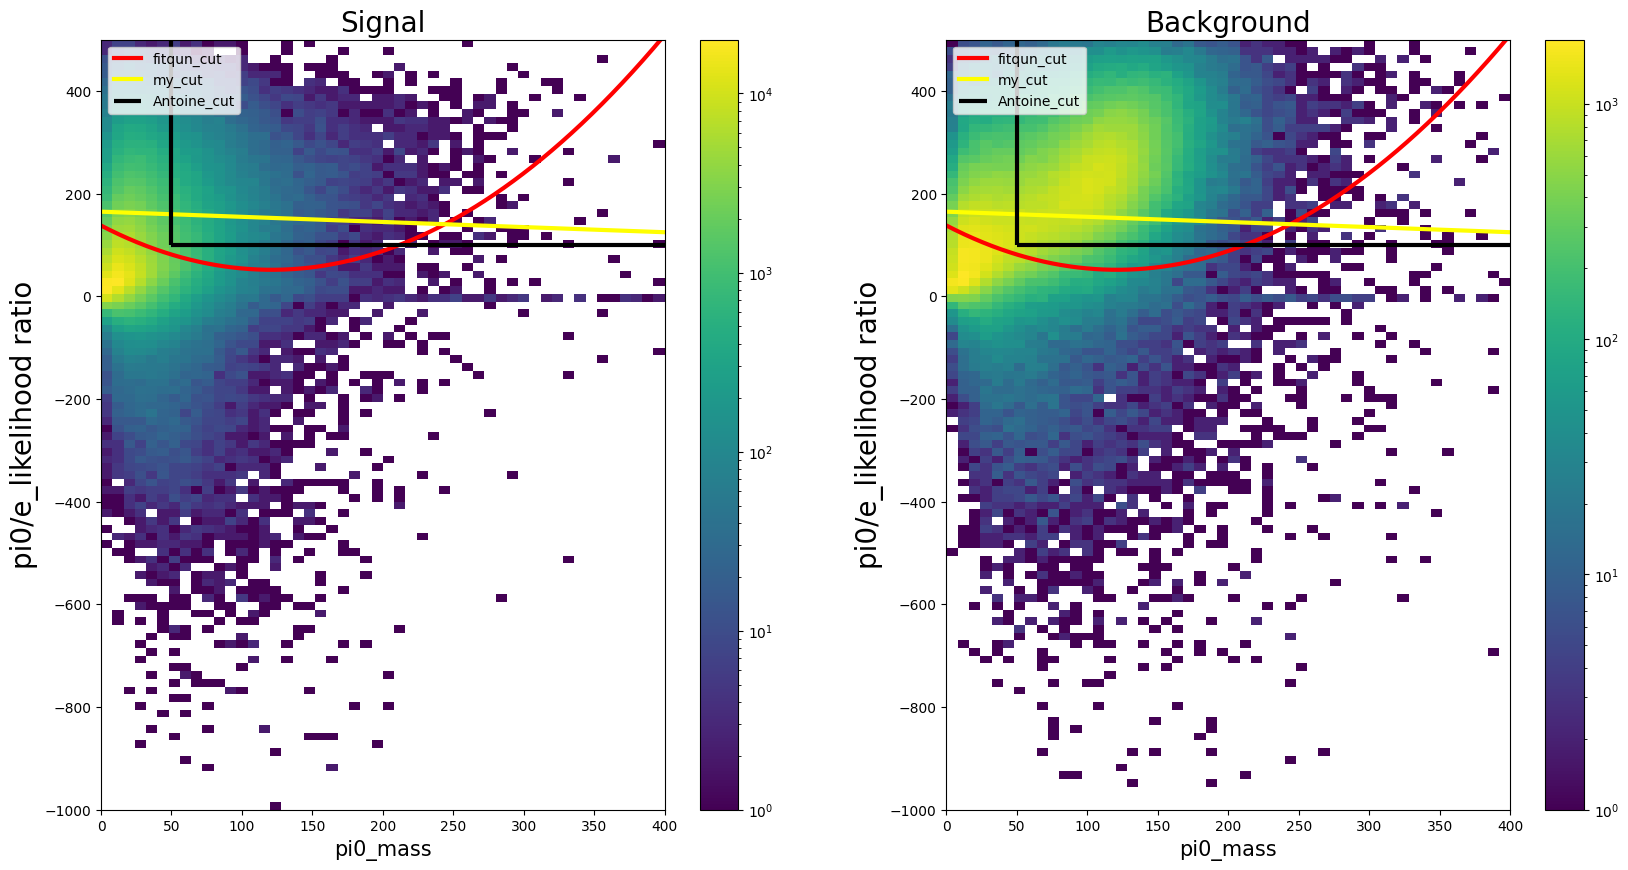

In [18]:
fig, axes = utils.plot_sg_bg(df_epi0_mom, 1, 3, 'pi0_mass', 'pi0/e_likelihood ratio', [0, 400], [-1000, 500], 50, 100)

# Applying the cuts: (Separating electron and pi0)

x = np.linspace(0,400, 1000)            # lr < -0.1*pi0_mass + 165
y = -x*0.1 + 165                        # My cut

y_1 = 138 - 1.42358*x + 0.00587911*x**2       # ~(lr > 138 - 1.42358*pi0_mass + 0.00587911*pi0_mass^2 ), fiTQun cuts

# ~(pi0_mass > 50 && lr > 70)
# Antoine's NotRemovedByPi0Cut 
          
    
#optimizing the cut: (y = mx+b)
# m, b, accuracy = utils.optimum_cut_linear(df_epi0_mom, 1, 3, 'pi0_mass', 'pi0/e_likelihood ratio', -0.1, 165, greater_than = False)
# print(m, b, accuracy)

print(utils.check_accuracy(df_epi0_mom[~((df_epi0_mom['pi0_mass'] > 250) & ((df_epi0_mom['pi0/e_likelihood ratio'] > 70)))], 1, 3))
print(utils.check_accuracy(df_epi0_mom[~(df_epi0_mom['pi0/e_likelihood ratio'] > (138 - 1.42358*df_epi0_mom['pi0_mass'] + 0.00587911*df_epi0_mom['pi0_mass']**2))], 1, 3))
print(utils.check_accuracy(df_epi0_mom[(df_epi0_mom['pi0/e_likelihood ratio'] < -0.1*df_epi0_mom['pi0_mass'] + 165)], 1, 3))


axes[0].plot(x,y_1, color = "red", linewidth =3 , label = 'fitqun_cut')
axes[1].plot(x,y_1, color = "red", linewidth =3 , label = 'fitqun_cut' )

axes[0].plot(x,y, color = "yellow", linewidth =3 , label = 'my_cut')
axes[1].plot(x,y, color = "yellow", linewidth =3 , label = 'my_cut' )


axes[0].vlines(50, 100, 1500, colors='black', linewidth=3, label = 'Antoine_cut')
axes[0].hlines(100, 50, 400, colors='black', linewidth=3)

axes[1].vlines(50, 100, 1500, colors='black', linewidth=3, label = 'Antoine_cut')
axes[1].hlines(100, 50, 400, colors='black', linewidth=3)



axes[0].legend()
axes[1].legend()

plt.show()



In [19]:
df_epi0_mass = df_epi0_mom[(df_epi0_mom['pi0/e_likelihood ratio'] < -0.1*df_epi0_mom['pi0_mass'] + 165)]

630.2214012196898


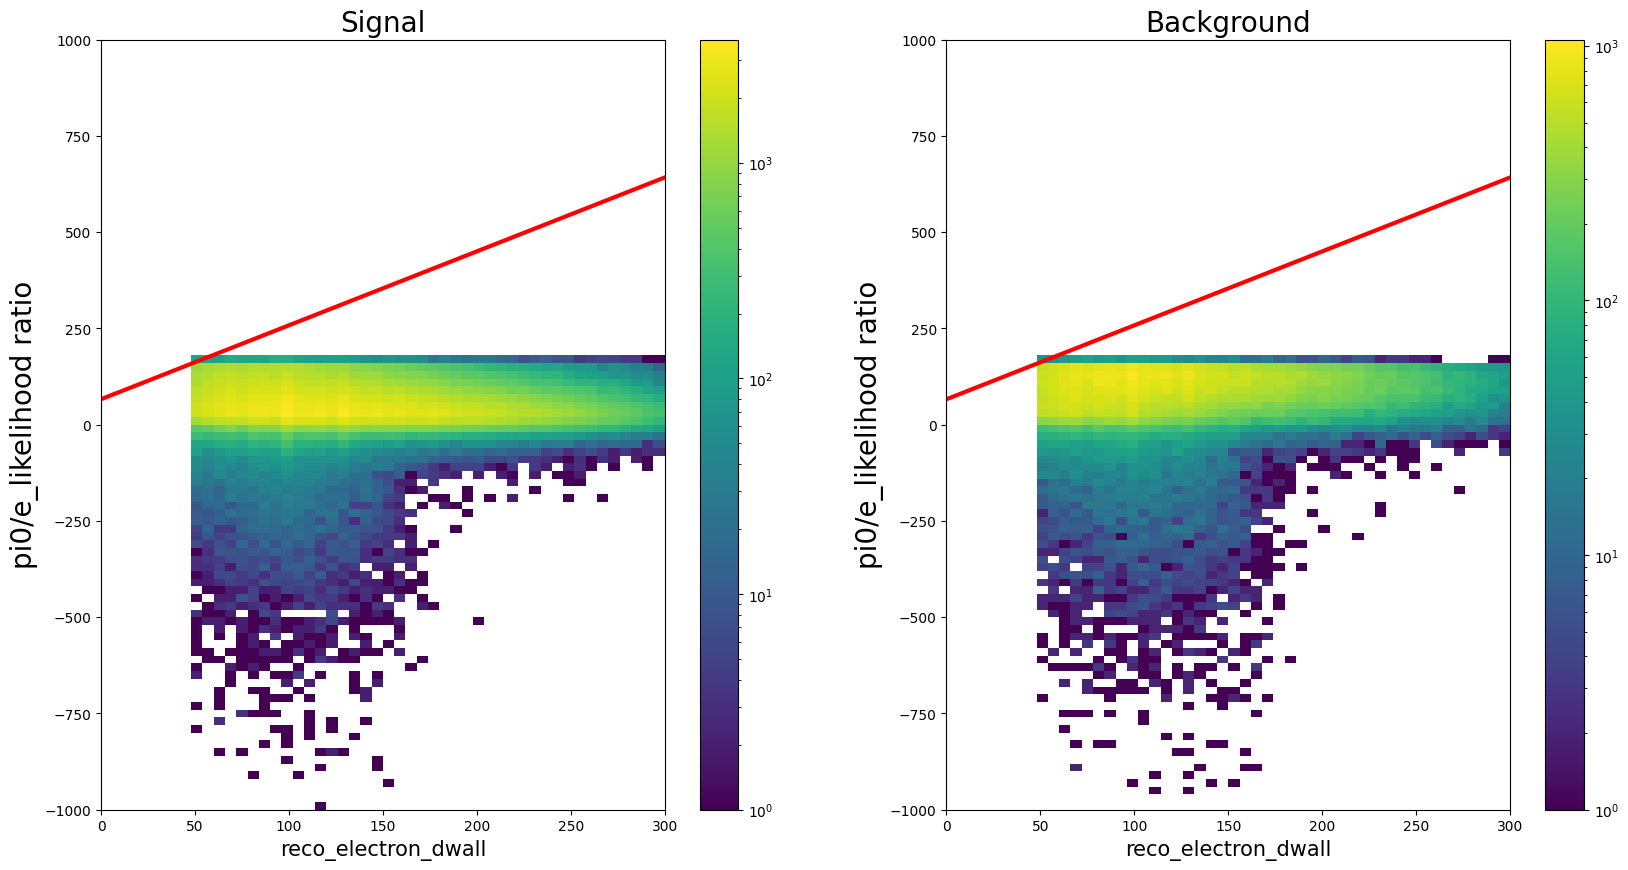

In [20]:
fig, axes = utils.plot_sg_bg(df_epi0_mass, 1, 3, 'reco_electron_dwall', 'pi0/e_likelihood ratio', [0, 300], [-1000, 1000], 50, 100)

# Applying the cuts: (Separating electron and pi0)

x = np.linspace(0,300, 1000)
y = 66.2 + x*1.92                           # My cut

# optimizing the cut: (y = mx+b)
# m, b, accuracy = utils.optimum_cut_linear(df_epi0_mass, 1, 3, 'reco_electron_dwall', 'pi0/e_likelihood ratio', 1.92, 66.2, greater_than = False)
# print(m, b, accuracy)
print(utils.check_accuracy(df_epi0_mass[(df_epi0_mass['pi0/e_likelihood ratio'] < 66.2 + 1.92*df_epi0_mass['reco_electron_dwall'])], 1, 3))

axes[0].plot(x,y, color = "red", linewidth =3 , label = 'my_cut')
axes[1].plot(x,y, color = "red", linewidth =3 , label = 'my_cut' )

plt.show()

In [21]:
df_epi0_dwall = df_epi0_mass[(df_epi0_mass['pi0/e_likelihood ratio'] < 1.92*df_epi0_mass['pi0_mass'] + 66.2)]

576.081834843504


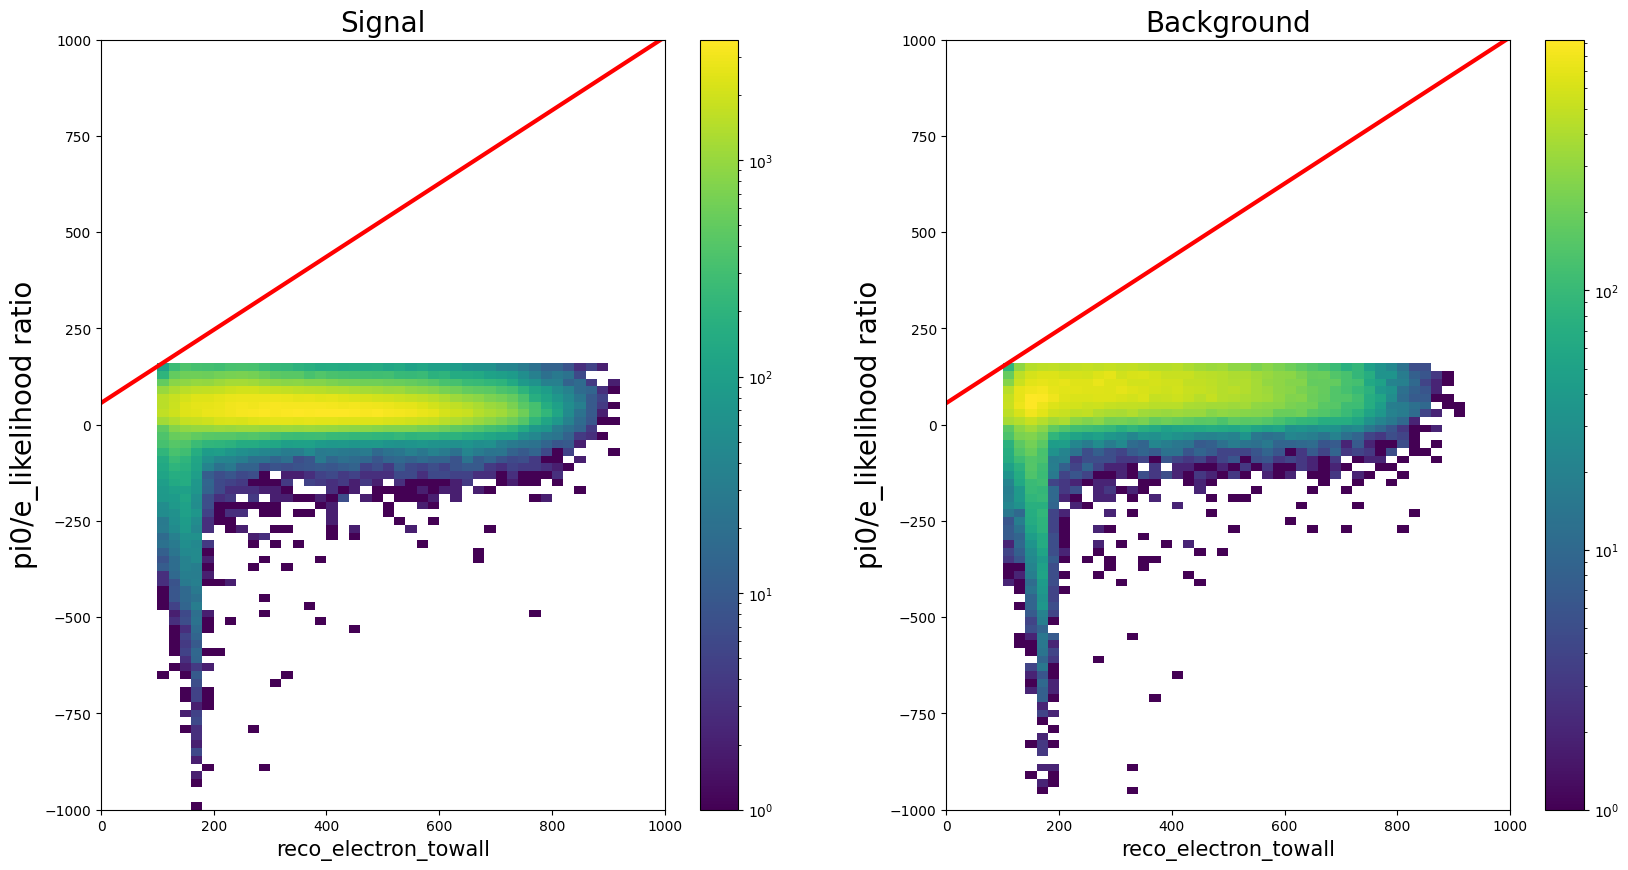

In [22]:
fig, axes = utils.plot_sg_bg(df_epi0_dwall, 1, 3, 'reco_electron_towall', 'pi0/e_likelihood ratio', [0, 1000], [-1000, 1000], 50, 100)

# Applying the cuts: (Separating electron and pi0)

x = np.linspace(0,1000, 1000)
y = 56.5 + x*0.95                           # My cut

# optimizing the cut: (y = mx+b)
# m, b, accuracy = utils.optimum_cut_linear(df_epi0_dwall, 1, 3, 'reco_electron_towall', 'pi0/e_likelihood ratio', 0.95, 56.5, greater_than = False)
# print(m, b, accuracy)

print(utils.check_accuracy(df_epi0_dwall[(df_epi0_dwall['pi0/e_likelihood ratio'] < 56.5 + 0.95*df_epi0_dwall['reco_electron_towall'])], 1, 3))

axes[0].plot(x,y, color = "red", linewidth =3 , label = 'my_cut')
axes[1].plot(x,y, color = "red", linewidth =3 , label = 'my_cut' )

plt.show()

In [23]:
df_epi0_towall = df_epi0_dwall[(df_epi0_dwall['pi0/e_likelihood ratio'] < 0.95*df_epi0_dwall['reco_electron_towall'] + 56.5)]

### fiTQun e/pi0 Separation Cuts

The separation cuts defined for electron/pi0 separation in fiTQun are:

- $ \text{lr} < 32.2 + 0.42 \times \text{reco_mom} $
- $ \text{lr} < 165 - 0.1 \times \text{pi0_mass}$
- $ \text{lr} < 66.2 + 1.92 \times \text{reco_dwall}$
- $ \text{lr} < 56.5 + 0.95 \times \text{reco_towall}$



In [24]:
sig_eff_emu = utils.sg_eff(df_base, utils.return_fq_emu_cuts(df_base), sg_label = 1)
bg_rej_emu = utils.bg_rej(df_base, utils.return_fq_emu_cuts(df_base), bg_label = 2)
print(sig_eff_emu, bg_rej_emu)

sig_eff_epi0 = utils.sg_eff(df_base, utils.return_fq_epi0_cuts(df_base), sg_label = 1)
bg_rej_epi0 = utils.bg_rej(df_base, utils.return_fq_epi0_cuts(df_base), bg_label = 3)
print(sig_eff_epi0, bg_rej_epi0)

0.8986325438821418 0.9648462674150194
0.7336622065782419 0.8173486947486904


**FiTQun Cut Analysis:**

After applying the FiTQun cuts, we observe the following signal and background event detection rates:

1. **e/mu Cuts:**
   - Approximately 90% of true signal events are correctly identified as signal.
   - 96% of background events are successfully rejected by the e/mu cuts.
   - However, around 4% of the background events are misclassified as signal.

2. **e/pi0 Cuts:**
   - About 73% of true signal events are correctly classified as signal.
   - 82% of background events are rejected by the e/pi0 cuts.
   - However, around 18% of the background events are misclassified as signal.


In [25]:
# Precison, recall, f1_score

utils.f1(df_base, utils.return_fq_emu_cuts(df_base), 1, 2)

(0.9625457235240509, 0.8986325438821418, 0.9294917389496019)

In [26]:
# Precison, recall, f1_score

utils.f1(df_base, utils.return_fq_epi0_cuts(df_base), 1, 3)

(0.7885791062726282, 0.7336622065782419, 0.7601300559711631)